# Data Visualization 
## Altair

> Altair is a declarative statistical visualization library for Python, based on Vega and Vega-Lite, and the source is available on GitHub.
>
> With Altair, you can spend more time understanding your data and its meaning. Altair’s API is simple, friendly and consistent and built on top of the powerful Vega-Lite visualization grammar. This elegant simplicity produces beautiful and effective visualizations with a minimal amount of code.

`Apologies if that sounds like a an advertisement.`

I did take it from the Altair website, after all.

We need to update and/or install some extra packages for later on this workbook. Let's do that now!

In [0]:
!pip install 'bokeh==1.3.4'
!pip install pyproj

But you can do a ton of cool stuff with it, and those are my own words. Let's take a tour of the **built-in** code snippets:

In [0]:
# load an example dataset
from vega_datasets import data
cars = data.cars()

# plot the dataset, referencing dataframe column names
import altair as alt
alt.Chart(cars).mark_bar().encode(
  x=alt.X('Miles_per_Gallon', bin=True),
  y='count()',
)

alt.Chart(...)

Making a histogram isn't terribly exciting, true.

But I do think it looks nicer than the standard pyplot histogram:

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


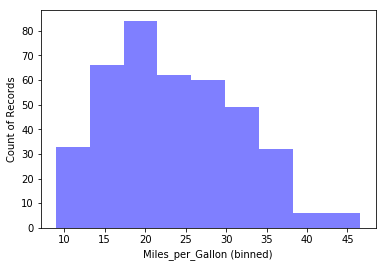

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
num_bins = 9
n, bins, patches = plt.hist(cars['Miles_per_Gallon'], num_bins, facecolor='blue', alpha=0.5)
plt.ylabel("Count of Records")
plt.xlabel("Miles_per_Gallon (binned)")
plt.show()


We can also very easily create stacked histograms:

In [0]:
# plot the dataset, referencing dataframe column names
alt.Chart(cars).mark_bar().encode(
  x=alt.X('Miles_per_Gallon', bin=True),
  y='count()',
  color='Origin'
)

alt.Chart(...)

Horizontal bar charts - remember, you use these if you have a ton of different bars.

Not exactly the case here, but it's just an example.

In [0]:
# plot the dataset, referencing dataframe column names
alt.Chart(cars).mark_bar().encode(
  x='mean(Miles_per_Gallon)',
  y='Origin',
  color='Origin'
)

alt.Chart(...)

But actually we don't need the legend here. Let's remove it by setting the legend to None. I had to google it, `legend` is apparently a characteristic of the color object. See https://altair-viz.github.io/user_guide/customization.html?highlight=legend#adjusting-the-legend for more explanation.

In [0]:
# plot the dataset, referencing dataframe column names
alt.Chart(cars).mark_bar().encode(
  x='mean(Miles_per_Gallon)',
  y='Origin',
  color=alt.Color('Origin', legend=None)
)

alt.Chart(...)

We can easily make a scatterplot. Check out the code below. First run it, and then verify what happens when you remove the `.interactive()`

In [0]:
# plot the dataset, referencing dataframe column names
import altair as alt
alt.Chart(cars).mark_point().encode(
  x='Horsepower',
  y='Miles_per_Gallon',
  color='Origin'
).interactive()

alt.Chart(...)

In [0]:
# plot the dataset, referencing dataframe column names
import altair as alt
alt.Chart(cars).mark_point().encode(
  x='Horsepower',
  y='Miles_per_Gallon',
  color='Origin'
).interactive()

alt.Chart(...)

Now we specify a `property`, enabling `interval selection`.

Try adding `interactive` again. Does the order in which you specify `properties` and `interactive` matter?

In [0]:
interval = alt.selection_interval()

alt.Chart(cars).mark_point().encode(
  x='Horsepower',
  y='Miles_per_Gallon',
  color=alt.condition(interval, 'Origin', alt.value('lightgray'))
).properties(
  selection=interval
)

alt.Chart(...)

We are now going to combine the interval selection and the horizontal bar chart.

Check out the code to see how easy it is!

In [0]:
interval = alt.selection_interval()

points = alt.Chart(cars).mark_point().encode(
  x='Horsepower',
  y='Miles_per_Gallon',
  color=alt.condition(interval, 'Origin', alt.value('lightgray'))
).properties(
  selection=interval
)

histogram = alt.Chart(cars).mark_bar().encode(
  x='count()',
  y='Origin',
  color='Origin'
).transform_filter(interval)

points & histogram

alt.VConcatChart(...)

Try to add the stacked bar chart from earlier in the same graphic. You will have to define it again. Don't forget to make it be affected by the interval selector!

In [0]:
#
# You will have to extend the code below
#
interval = alt.selection_interval()

points = alt.Chart(cars).mark_point().encode(
  x='Horsepower',
  y='Miles_per_Gallon',
  color=alt.condition(interval, 'Origin', alt.value('lightgray'))
).properties(
  selection=interval
)

histogram = alt.Chart(cars).mark_bar().encode(
  x='count()',
  y='Origin',
  color='Origin'
).transform_filter(interval)

points & histogram

alt.VConcatChart(...)

OK, step by step we are learning more about how altair works.
Take another look at how the chart is specified. We specify a `base alt.Chart`, and already enter some options in the `encode` field, such as the value for `x` and `y`.

Turns out that we can reuse that basic element in the same code block, and specify some additional values.



In [0]:
interval = alt.selection_interval()

base = alt.Chart(cars).mark_point().encode(
  y='Miles_per_Gallon',
  color=alt.condition(interval, 'Origin', alt.value('lightgray'))
).properties(
  selection=interval
)

histogram = alt.Chart(cars).mark_bar().encode(
  x='count()',
  y='Origin',
  color='Origin'
).transform_filter(interval)

( base.encode(x ='Acceleration') | base.encode(x='Horsepower') ) & histogram

alt.VConcatChart(...)

Can you now guess how to make a 1D scatterplot?

In [0]:
#
# Your code goes here
#

Enough points. Let's add some lines.

In [0]:
points = alt.Chart(cars).mark_point().encode(
  x='Year:T',
  y='Miles_per_Gallon',
  color='Origin'
).properties(
  width=800
)

lines = alt.Chart(cars).mark_line().encode(
  x='Year:T',
  y='mean(Miles_per_Gallon)',
  color='Origin'
).properties(
  width=800
).interactive(bind_y=False)
              
points + lines

alt.LayerChart(...)

Oh, we are now plotting two things on the same canvas! Check the code. Where do you think this happens?

What else is new? Can you guess what `bind_y=False` does? Remember the panning chart from a while back. Or just take it out `bind_y=False`, to experience the effect.

In [0]:
points = alt.Chart(cars).mark_point().encode(
  x='Year:T',
  y='Miles_per_Gallon',
  color='Origin'
).properties(
  width=800
)

lines = alt.Chart(cars).mark_line().encode(
  x='Year:T',
  y='mean(Miles_per_Gallon)',
  color='Origin'
).properties(
  width=800
)
              
points + lines

alt.LayerChart(...)

As long as you are reading the code anyway, why not try and make it so that instead of displaying the mean, we show the median. It is a better representation of the "typical" car, anyway.

In [0]:
#
# Your code goes here
#

Visualizing relationships between different features is often interesting. It's easy, using altair!
I practically copy pasted this code from https://altair-viz.github.io/gallery/scatter_matrix.html

I don't really get why they made it an `interactive()`, however. Wouldn't it be better to make it filterable by selection?

In [0]:
alt.Chart(cars).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color='Origin:N'
).properties(
    width=150,
    height=150
).repeat(
    row=['Horsepower', 'Acceleration', 'Miles_per_Gallon'],
    column=['Miles_per_Gallon', 'Acceleration', 'Horsepower']
).interactive()

alt.RepeatChart(...)

### Marker size as additional feature

Just so you know, there are other datasets in the vega_datasets. For example, the `iris`. dataset Take a look below.

In [0]:
source = data.iris()

alt.Chart(source).mark_circle().encode(
    alt.X('sepalLength', scale=alt.Scale(zero=False)),
    alt.Y('sepalWidth', scale=alt.Scale(zero=False, padding=1)),
    color='species',
    size='petalWidth'
)

alt.Chart(...)

We can reuse that plot with some dimensions from the `cars` dataset.
Let's see what are the available columns.

In [0]:
print(cars.columns)

Index(['Acceleration', 'Cylinders', 'Displacement', 'Horsepower',
       'Miles_per_Gallon', 'Name', 'Origin', 'Weight_in_lbs', 'Year'],
      dtype='object')


In [0]:
source = data.cars()

alt.Chart(source).mark_circle().encode(
    alt.X('Acceleration', scale=alt.Scale(zero=False)),
    alt.Y('Horsepower', scale=alt.Scale(zero=False, padding=1)),
    color='Origin',
    size='Displacement',
    tooltip=['Name', 'Horsepower', 'Miles_per_Gallon']
)

alt.Chart(...)

Let's decrease the opacity to make the overlap more visible.

In [0]:
source = data.cars()

alt.Chart(source).mark_circle(opacity=0.5).encode(
    alt.X('Acceleration', scale=alt.Scale(zero=False)),
    alt.Y('Horsepower', scale=alt.Scale(zero=False, padding=1)),
    color='Origin',
    size='Displacement',
    tooltip=['Name', 'Horsepower', 'Miles_per_Gallon']
)

alt.Chart(...)

### Facets - splitting into groups

Let's split the chart in three, one per `Origin`, and move the `Year` to the color dimension.

As per the color guidelines we discussed earlier today, this automatically changes the color schale from a qualitative one to a sequential one based on the hue.

In [0]:
source = data.cars()

alt.Chart(source).mark_circle(opacity=0.5).encode(
    alt.X('Acceleration', scale=alt.Scale(zero=False)),
    alt.Y('Horsepower', scale=alt.Scale(zero=False, padding=1)),
    color='Year',
    size='Displacement',
    tooltip=['Name', 'Horsepower', 'Miles_per_Gallon']
).facet('Origin')

alt.FacetChart(...)

## Some more functional snippets

### Tooltip

In [0]:
source = data.cars()

alt.Chart(source).mark_circle(size=60).encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
    tooltip=['Name', 'Origin', 'Horsepower', 'Miles_per_Gallon']
).interactive()


alt.Chart(...)

### Bushing and data tables

In [0]:
source = data.cars()

# Brush for selection
brush = alt.selection(type='interval')

# Scatter Plot
points = alt.Chart(source).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=alt.condition(brush, 'Cylinders:O', alt.value('grey'))
).add_selection(brush)

# Base chart for data tables
ranked_text = alt.Chart(source).mark_text().encode(
    y=alt.Y('row_number:O',axis=None)
).transform_window(
    row_number='row_number()'
).transform_filter(
    brush
).transform_window(
    rank='rank(row_number)'
).transform_filter(
    alt.datum.rank<20
)

# Data Tables
horsepower = ranked_text.encode(text='Horsepower:N').properties(title='Horsepower')
mpg = ranked_text.encode(text='Miles_per_Gallon:N').properties(title='MPG')
origin = ranked_text.encode(text='Origin:N').properties(title='Origin')
text = alt.hconcat(horsepower, mpg, origin) # Combine data tables

# Build chart
alt.hconcat(
    points,
    text
).resolve_legend(
    color="independent"
)

alt.HConcatChart(...)

### Selection slider

In [0]:
rand = np.random.RandomState(42)

df = pd.DataFrame({
    'xval': range(100),
    'yval': rand.randn(100).cumsum()
})

slider = alt.binding_range(min=0, max=100, step=1, name='cutoff:')
selector = alt.selection_single(name="SelectorName", fields=['cutoff'],
                                bind=slider, init={'cutoff': 50})

alt.Chart(df).mark_point().encode(
    x='xval',
    y='yval',
    color=alt.condition(
        alt.datum.xval < selector.cutoff,
        alt.value('red'), alt.value('blue')
    )
).add_selection(
    selector
)

alt.Chart(...)

### Points and timeseries, linked

In [0]:
np.random.seed(0)

n_objects = 20
n_times = 50

# Create one (x, y) pair of metadata per object
locations = pd.DataFrame({
    'id': range(n_objects),
    'x': np.random.randn(n_objects),
    'y': np.random.randn(n_objects)
})

# Create a 50-element time-series for each object
timeseries = pd.DataFrame(np.random.randn(n_times, n_objects).cumsum(0),
                          columns=locations['id'],
                          index=pd.RangeIndex(0, n_times, name='time'))

# Melt the wide-form timeseries into a long-form view
timeseries = timeseries.reset_index().melt('time')

# Merge the (x, y) metadata into the long-form view
timeseries['id'] = timeseries['id'].astype(int)  # make merge not complain
data = pd.merge(timeseries, locations, on='id')

# Data is prepared, now make a chart

selector = alt.selection_single(empty='all', fields=['id'])

base = alt.Chart(data).properties(
    width=250,
    height=250
).add_selection(selector)

points = base.mark_point(filled=True, size=200).encode(
    x='mean(x)',
    y='mean(y)',
    color=alt.condition(selector, 'id:O', alt.value('lightgray'), legend=None),
).interactive()

timeseries = base.mark_line().encode(
    x='time',
    y=alt.Y('value', scale=alt.Scale(domain=(-15, 15))),
    color=alt.Color('id:O', legend=None)
).transform_filter(
    selector
)

points | timeseries

alt.HConcatChart(...)

### Heatmap and points

In [0]:
from vega_datasets import data

source = data.movies.url

heatmap = alt.Chart(source).mark_rect().encode(
    alt.X('IMDB_Rating:Q', bin=True),
    alt.Y('Rotten_Tomatoes_Rating:Q', bin=True),
    alt.Color('count()', scale=alt.Scale(scheme='greenblue'))
)

points = alt.Chart(source).mark_circle(
    color='black',
    size=5,
).encode(
    x='IMDB_Rating:Q',
    y='Rotten_Tomatoes_Rating:Q',
)

heatmap + points

alt.LayerChart(...)

### Vertical drag bar

In [0]:
source = pd.DataFrame(np.cumsum(np.random.randn(100, 3), 0).round(2),
                    columns=['A', 'B', 'C'], index=pd.RangeIndex(100, name='x'))
source = source.reset_index().melt('x', var_name='category', value_name='y')

# Create a selection that chooses the nearest point & selects based on x-value
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['x'], empty='none')

# The basic line
line = alt.Chart(source).mark_line(interpolate='basis').encode(
    x='x:Q',
    y='y:Q',
    color='category:N'
)

# Transparent selectors across the chart. This is what tells us
# the x-value of the cursor
selectors = alt.Chart(source).mark_point().encode(
    x='x:Q',
    opacity=alt.value(0),
).add_selection(
    nearest
)

# Draw points on the line, and highlight based on selection
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw text labels near the points, and highlight based on selection
text = line.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest, 'y:Q', alt.value(' '))
)

# Draw a rule at the location of the selection
rules = alt.Chart(source).mark_rule(color='gray').encode(
    x='x:Q',
).transform_filter(
    nearest
)

# Put the five layers into a chart and bind the data
alt.layer(
    line, selectors, points, rules, text
).properties(
    width=600, height=300
)

alt.LayerChart(...)

### External data

In [0]:
url = 'https://gist.githubusercontent.com/dvorkbod/433cc731c5d497d1db6140225361dbdb/raw/4fb2d10a5bb782c3f643315d6d5fb487964b1367/DutchShellFish_restricted_3classes.csv'
df = pd.read_csv(url)
df = df[df['Bedabundance'] < df['Bedabundance'].quantile(.90)]
class_df = df.sample(n=5000, random_state=1)
class_df.columns

Index(['datecollected', 'yearcollected', 'monthcollected', 'decimallongitude',
       'decimallatitude', 'Bedabundance', 'fishing', 'bathy', 'BO_phosphate',
       'BO_nitrate', 'BO_salinity', 'BO_sstmax', 'BO_sstmean', 'BO_dissox',
       'BO2_curvelmax_bdmax', 'BO2_lightbotmax_bdmax', 'coastdist',
       'substrate', 'scientificname'],
      dtype='object')

In [0]:
alt.Chart(class_df).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
#    color=alt.condition(interval, 'substrate', alt.value('lightgray'))
    color='substrate:N'
).properties(
    selection=interval,
    width=150,
    height=150
).repeat(
    row=['decimallongitude', 'decimallatitude', 'BO_dissox'],
    column=['BO_dissox', 'decimallatitude', 'decimallongitude']
).interactive()

alt.RepeatChart(...)

There is a ton more material to be found at

https://vallandingham.me/altair_intro.html

https://altair-viz.github.io/gallery/index.html

https://altair-viz.github.io/index.html

https://matthewkudija.com/blog/2018/06/22/altair-interactive/

# Solutions

Solution to the one with the median

In [0]:
points = alt.Chart(cars).mark_point().encode(
  x='Year:T',
  y='Miles_per_Gallon',
  color=alt.condition(interval, 'Origin', alt.value('lightgray'))
).properties(
  selection=interval,
    width=800
)

lines = alt.Chart(cars).mark_line().encode(
  x='Year:T',
  y='median(Miles_per_Gallon)',
  color='Origin'
).properties(
  width=800,
).transform_filter(interval)
              
points + lines

alt.LayerChart(...)

Solution to the first multi-scatterplot

In [0]:
alt.Chart(cars).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color=alt.condition(interval, 'Origin', alt.value('lightgray'))
#    color='Origin:N'
).properties(
    selection=interval,
    width=150,
    height=150
).repeat(
    row=['Horsepower', 'Acceleration', 'Miles_per_Gallon'],
    column=['Miles_per_Gallon', 'Acceleration', 'Horsepower']
)

alt.RepeatChart(...)

# Appendix: Some more environments runnable in the browser

## ObservableHQ

ObservableHQ JavaScript based visualisation library and tools. It takes the Python notebook ideas and applies them to JavaScript. It allows for more realtime feedback and allows cells to reference each other, updating the visualization zhen one of the cells changes.

But that's a lot of words, go to https://observablehq.com/@observablehq/five-minute-introduction for a...five minute introduction.

Debugging is a lot more difficult, however.

## Seaborn

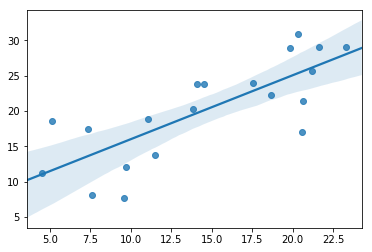

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Generate some random data
num_points = 20
# x will be 5, 6, 7... but also twiddled randomly
x = 5 + np.arange(num_points) + np.random.randn(num_points)
# y will be 10, 11, 12... but twiddled even more randomly
y = 10 + np.arange(num_points) + 5 * np.random.randn(num_points)
sns.regplot(x, y)
plt.show()

That's a simple scatterplot with a nice regression line fit to it, all with just one call to Seaborn's [regplot](http://seaborn.pydata.org/generated/seaborn.regplot.html#seaborn.regplot).

Here's a Seaborn [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html):

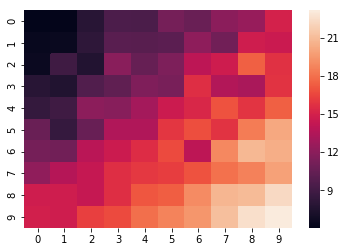

In [0]:
import matplotlib.pyplot as plt
import numpy as np

# Make a 10 x 10 heatmap of some random data
side_length = 10
# Start with a 10 x 10 matrix with values randomized around 5
data = 5 + np.random.randn(side_length, side_length)
# The next two lines make the values larger as we get closer to (9, 9)
data += np.arange(side_length)
data += np.reshape(np.arange(side_length), (side_length, 1))
# Generate the heatmap
sns.heatmap(data)
plt.show()

## Bokeh

In [0]:
import numpy as np
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

# Call once to configure Bokeh to display plots inline in the notebook.
output_notebook()

In [0]:
N = 4000
x = np.random.random(size=N) * 100
y = np.random.random(size=N) * 100
radii = np.random.random(size=N) * 1.5
colors = ["#%02x%02x%02x" % (r, g, 150) for r, g in zip(np.floor(50+2*x).astype(int), np.floor(30+2*y).astype(int))]

p = figure()
p.circle(x, y, radius=radii, fill_color=colors, fill_alpha=0.6, line_color=None)
show(p)

In [0]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import CategoricalColorMapper, ColumnDataSource
from bokeh.palettes import inferno
#from bokeh.tile_providers import get_provider, Vendors

In [0]:
from bokeh.tile_providers import get_provider, Vendors

In [0]:
from pyproj import Proj, transform

In [0]:
wgs84=Proj("+init=EPSG:4326") # LatLon with WGS84 datum used by GPS units and Google Earth
osgb36=Proj("+init=EPSG:3857") # UK Ordnance Survey, 1936 datum

In [0]:
xx3, yy3 = transform(wgs84, osgb36, class_df['decimallongitude'].tolist(), class_df['decimallatitude'].tolist())
class_df['decimallongitude']=xx3
class_df['decimallatitude']=yy3
x_range3=(min(class_df['decimallongitude']),max(class_df['decimallongitude']))
y_range3=(min(class_df['decimallatitude']),max(class_df['decimallatitude']))
print(x_range3)

(357150.0325906877, 728215.0026437296)


In [0]:
p = figure(x_axis_label='longitude',y_axis_label='latitude',tools= "pan,wheel_zoom",x_range=x_range3,y_range=y_range3,)  

In [0]:
color_mapper = CategoricalColorMapper(factors=class_df['scientificname'].unique(),palette=inferno(256))

In [0]:
source_df = ColumnDataSource(class_df)

In [0]:
tile_provider = get_provider(Vendors.CARTODBPOSITRON)

p.add_tile(tile_provider)

p.circle('decimallongitude','decimallatitude',source=source_df,color=dict(field='scientificname', transform=color_mapper))



GlyphRenderer(id='1133', ...)

In [0]:
show(p)

In [0]:
from collections import OrderedDict
from math import log, sqrt

import numpy as np
import pandas as pd
from six.moves import cStringIO as StringIO

from bokeh.plotting import figure, show, output_file

antibiotics = """
bacteria,                        penicillin, streptomycin, neomycin, gram
Mycobacterium tuberculosis,      800,        5,            2,        negative
Salmonella schottmuelleri,       10,         0.8,          0.09,     negative
Proteus vulgaris,                3,          0.1,          0.1,      negative
Klebsiella pneumoniae,           850,        1.2,          1,        negative
Brucella abortus,                1,          2,            0.02,     negative
Pseudomonas aeruginosa,          850,        2,            0.4,      negative
Escherichia coli,                100,        0.4,          0.1,      negative
Salmonella (Eberthella) typhosa, 1,          0.4,          0.008,    negative
Aerobacter aerogenes,            870,        1,            1.6,      negative
Brucella antracis,               0.001,      0.01,         0.007,    positive
Streptococcus fecalis,           1,          1,            0.1,      positive
Staphylococcus aureus,           0.03,       0.03,         0.001,    positive
Staphylococcus albus,            0.007,      0.1,          0.001,    positive
Streptococcus hemolyticus,       0.001,      14,           10,       positive
Streptococcus viridans,          0.005,      10,           40,       positive
Diplococcus pneumoniae,          0.005,      11,           10,       positive
"""

drug_color = OrderedDict([
    ("Penicillin",   "#0d3362"),
    ("Streptomycin", "#c64737"),
    ("Neomycin",     "black"  ),
])

gram_color = OrderedDict([
    ("negative", "#e69584"),
    ("positive", "#aeaeb8"),
])

df = pd.read_csv(StringIO(antibiotics),
                 skiprows=1,
                 skipinitialspace=True,
                 engine='python')

width = 800
height = 800
inner_radius = 90
outer_radius = 300 - 10

minr = sqrt(log(.001 * 1E4))
maxr = sqrt(log(1000 * 1E4))
a = (outer_radius - inner_radius) / (minr - maxr)
b = inner_radius - a * maxr

def rad(mic):
    return a * np.sqrt(np.log(mic * 1E4)) + b

big_angle = 2.0 * np.pi / (len(df) + 1)
small_angle = big_angle / 7

p = figure(plot_width=width, plot_height=height, title="",
    x_axis_type=None, y_axis_type=None,
    x_range=(-420, 420), y_range=(-420, 420),
    min_border=0, outline_line_color="black",
    background_fill_color="#f0e1d2")

p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

# annular wedges
angles = np.pi/2 - big_angle/2 - df.index.to_series()*big_angle
colors = [gram_color[gram] for gram in df.gram]
p.annular_wedge(
    0, 0, inner_radius, outer_radius, -big_angle+angles, angles, color=colors,
)

# small wedges
p.annular_wedge(0, 0, inner_radius, rad(df.penicillin),
                -big_angle+angles+5*small_angle, -big_angle+angles+6*small_angle,
                color=drug_color['Penicillin'])
p.annular_wedge(0, 0, inner_radius, rad(df.streptomycin),
                -big_angle+angles+3*small_angle, -big_angle+angles+4*small_angle,
                color=drug_color['Streptomycin'])
p.annular_wedge(0, 0, inner_radius, rad(df.neomycin),
                -big_angle+angles+1*small_angle, -big_angle+angles+2*small_angle,
                color=drug_color['Neomycin'])

# circular axes and lables
labels = np.power(10.0, np.arange(-3, 4))
radii = a * np.sqrt(np.log(labels * 1E4)) + b
p.circle(0, 0, radius=radii, fill_color=None, line_color="white")
p.text(0, radii[:-1], [str(r) for r in labels[:-1]],
       text_font_size="8pt", text_align="center", text_baseline="middle")

# radial axes
p.annular_wedge(0, 0, inner_radius-10, outer_radius+10,
                -big_angle+angles, -big_angle+angles, color="black")

# bacteria labels
xr = radii[0]*np.cos(np.array(-big_angle/2 + angles))
yr = radii[0]*np.sin(np.array(-big_angle/2 + angles))
label_angle=np.array(-big_angle/2+angles)
label_angle[label_angle < -np.pi/2] += np.pi # easier to read labels on the left side
p.text(xr, yr, df.bacteria, angle=label_angle,
       text_font_size="9pt", text_align="center", text_baseline="middle")

# OK, these hand drawn legends are pretty clunky, will be improved in future release
p.circle([-40, -40], [-370, -390], color=list(gram_color.values()), radius=5)
p.text([-30, -30], [-370, -390], text=["Gram-" + gr for gr in gram_color.keys()],
       text_font_size="7pt", text_align="left", text_baseline="middle")

p.rect([-40, -40, -40], [18, 0, -18], width=30, height=13,
       color=list(drug_color.values()))
p.text([-15, -15, -15], [18, 0, -18], text=list(drug_color),
       text_font_size="9pt", text_align="left", text_baseline="middle")

output_file("burtin.html", title="burtin.py example")

show(p)

## CartoPY

https://scitools.org.uk/cartopy/docs/latest/

> Cartopy is a Python package designed for geospatial data processing in order to produce maps and other geospatial data analyses.
>
> Cartopy makes use of the powerful PROJ.4, NumPy and Shapely libraries and includes a programmatic interface built on top of Matplotlib for the creation of publication quality maps.
>
> Key features of cartopy are its object oriented projection definitions, and its ability to transform points, lines, vectors, polygons and images between those projections.
>
> You will find cartopy especially useful for large area / small scale data, where Cartesian assumptions of spherical data traditionally break down. If you’ve ever experienced a singularity at the pole or a cut-off at the dateline, it is likely you will appreciate cartopy’s unique features!